In [1]:
## a quick tutorial on hyperparameter tuning using gridsearch
## tutorial urls:
## https://www.youtube.com/watch?v=TvB_3jVIHhg
## https://www.kaggle.com/code/amansingh23/concrete-strength-prediction

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('../Datasets/concrete_data.csv')

print(data.shape)
data.head(2)

(1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


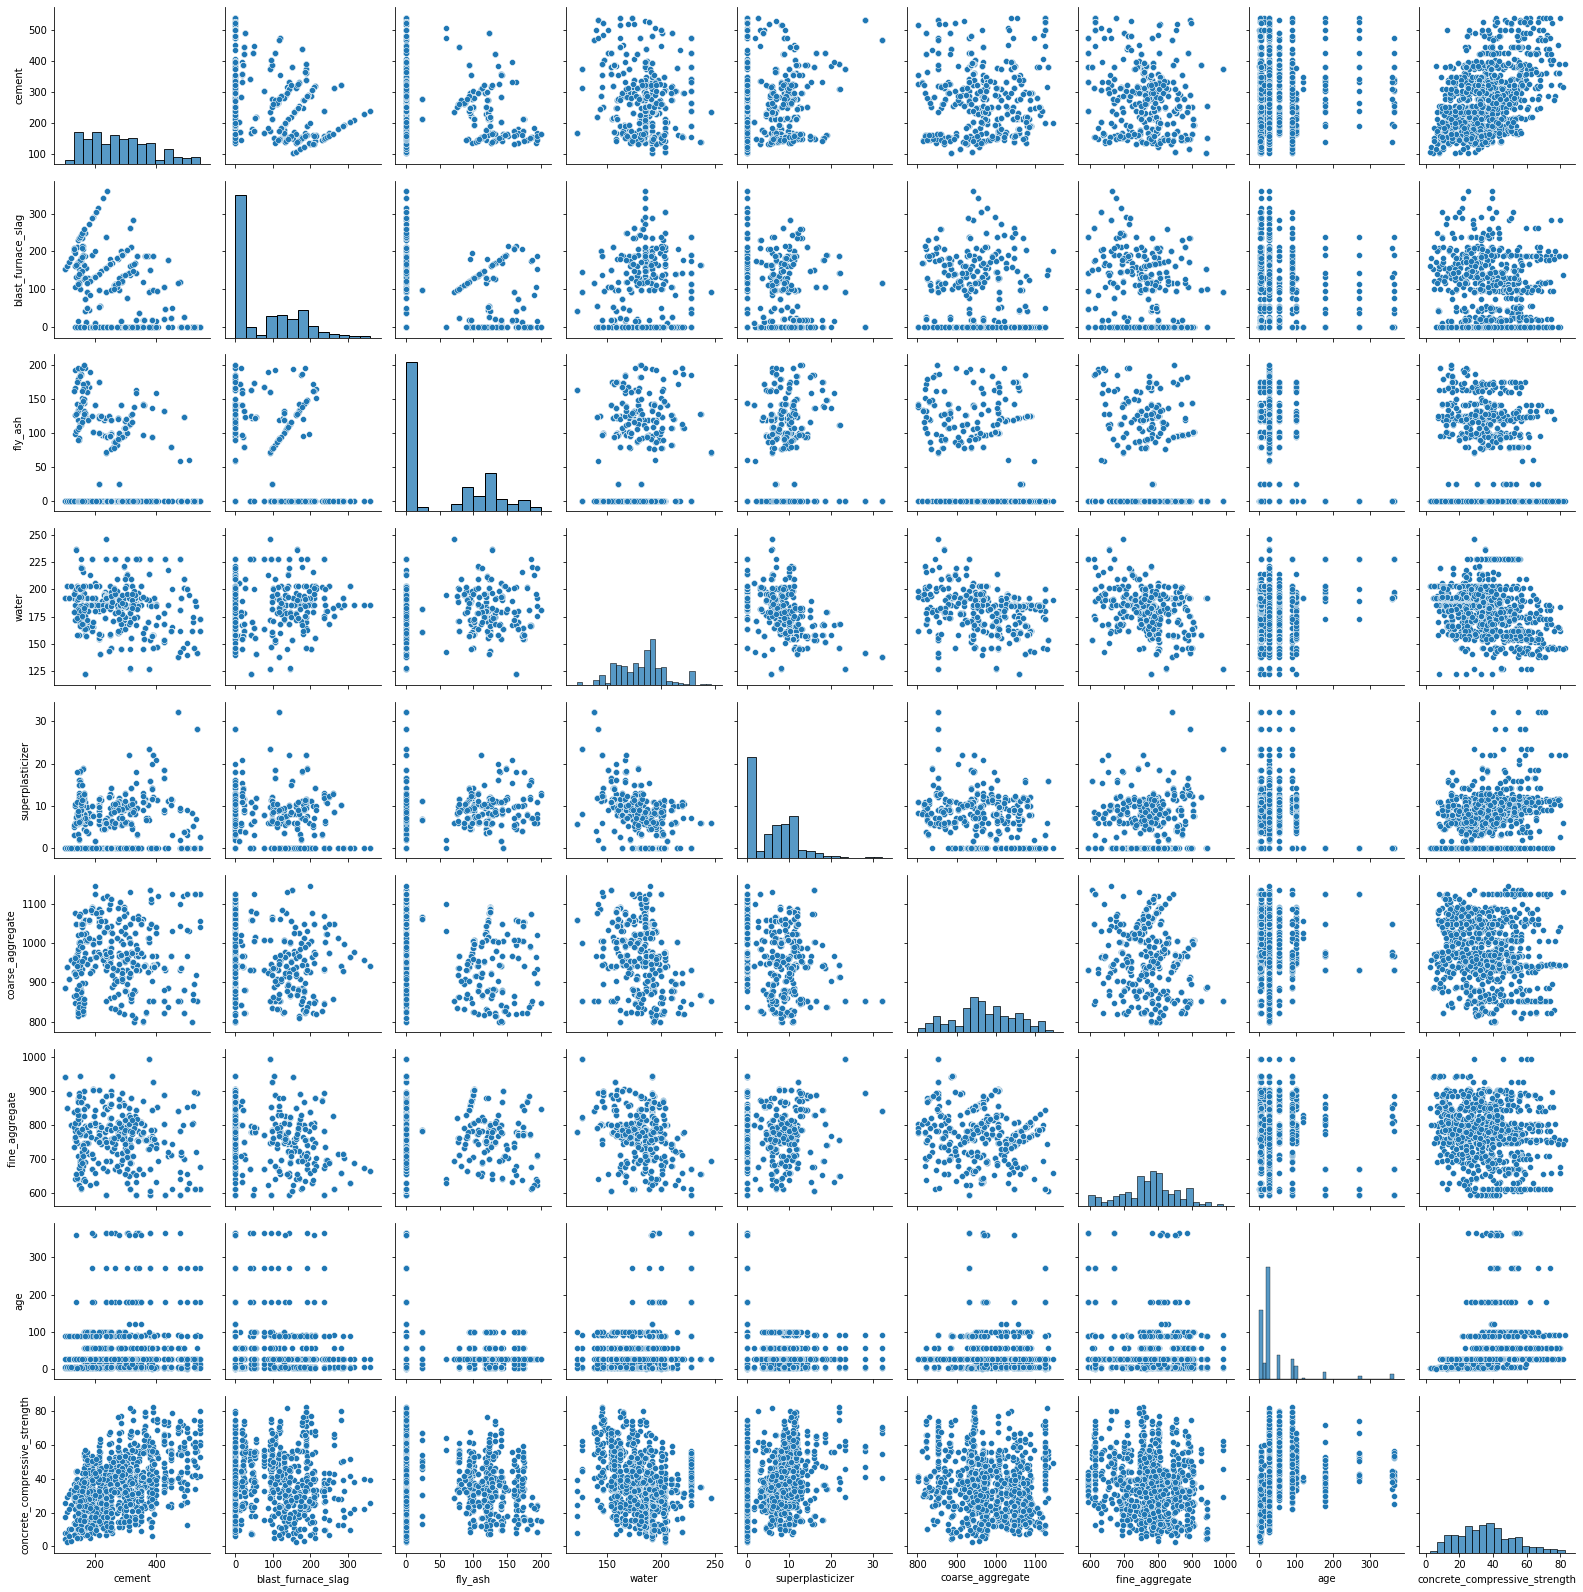

In [6]:
sns.pairplot(data)

In [9]:
X = data.iloc[:, :8].values
y = data.iloc[:, 8].values.reshape(-1, 1)

print(X.shape, y.shape)

(1030, 8) (1030, 1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824, 1) (206, 1)


In [23]:
## create model with no hyperparameters passed
xgb_model = XGBRegressor(random_state=2021)

In [24]:
## create dictionary of hyperparameters to search
## 72 possible combinations to search
search_space = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 6, 9],
    "gamma": [0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

In [25]:
## Note: sklearn.metrics.SCORERS.keys() is a resource for what to pass for scoring
GS = GridSearchCV(
    estimator = xgb_model,
    param_grid = search_space,
    scoring = ["r2", "neg_root_mean_squared_error"],
    refit = "r2",
    cv = 5,
    verbose = 4
)

In [26]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-35.192) r2: (test=-3.685) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-36.463) r2: (test=-4.022) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-35.801) r2: (test=-3.374) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-35.460) r2: (test=-3.748) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-37.090) r2: (test=-3.535) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-32.121) r2: (test=-2.903) total tim

[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-9.152) r2: (test=0.714) total time=   0.3s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-9.269) r2: (test=0.676) total time=   0.2s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-10.315) r2: (test=0.649) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-5.062) r2: (test=0.903) total time=   0.7s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-6.040) r2: (test=0.862) total time=   0.8s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-5.558) r2: (test=0.895) total time=   0.7s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimator

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-4.065) r2: (test=0.937) total time=   0.2s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-4.990) r2: (test=0.906) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-4.327) r2: (test=0.936) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-4.622) r2: (test=0.919) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-5.790) r2: (test=0.890) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-4.058) r2: (test=0.938) total time=   0.3s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; n

[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-6.935) r2: (test=0.841) total time=   0.3s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-6.749) r2: (test=0.828) total time=   0.9s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-6.195) r2: (test=0.855) total time=   0.9s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-6.953) r2: (test=0.835) total time=   0.8s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-5.799) r2: (test=0.873) total time=   0.9s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-6.935) r2: (test=0.841) total time=   1.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_s

[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-35.788) r2: (test=-3.371) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-35.434) r2: (test=-3.741) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-37.039) r2: (test=-3.522) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-31.977) r2: (test=-2.868) total time=   0.3s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-33.296) r2: (test=-3.187) total time=   0.4s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-32.656) r2: (test=-2.640) total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, 

[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.276) r2: (test=0.931) total time=   1.2s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.770) r2: (test=0.914) total time=   1.3s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.734) r2: (test=0.923) total time=   1.2s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.697) r2: (test=0.917) total time=   1.2s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-5.774) r2: (test=0.890) total time=   1.2s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.425) r2: (test=0.926) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg

[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.768) r2: (test=0.914) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-6.210) r2: (test=0.873) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4.711) r2: (test=0.916) total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5.292) r2: (test=0.894) total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5.164) r2: (test=0.909) total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4.721) r2: (test=0.916) total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [28]:
print(GS.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021,
             reg_alpha=0, reg_lambda=1, ...)


In [29]:
print(GS.best_params_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


In [30]:
print(GS.best_score_)

0.9228097089517535


In [32]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv")